In [1]:
import os
import sys

# Move up to the correct project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

print("Updated Python path:", sys.path)  # Debugging check

Updated Python path: ['c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311', '', 'C:\\Users\\tlfin\\AppData\\Roaming\\Python\\Python311\\site-packages', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\Pythonwin', 'e:\\Studienarbeit_GitHub\\Studienarbeit']


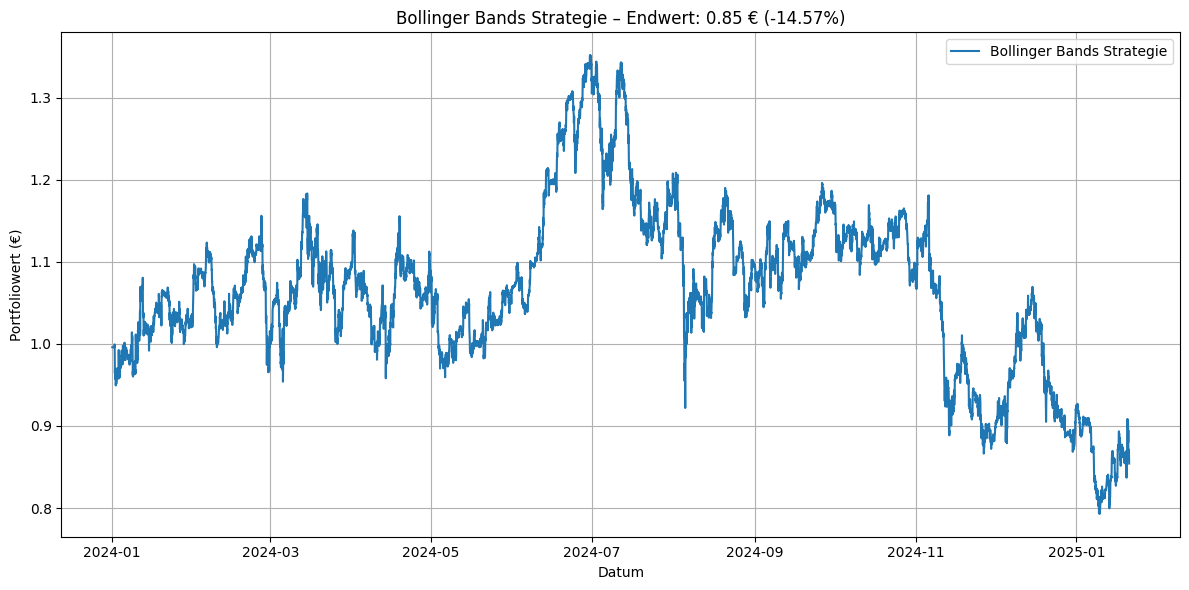

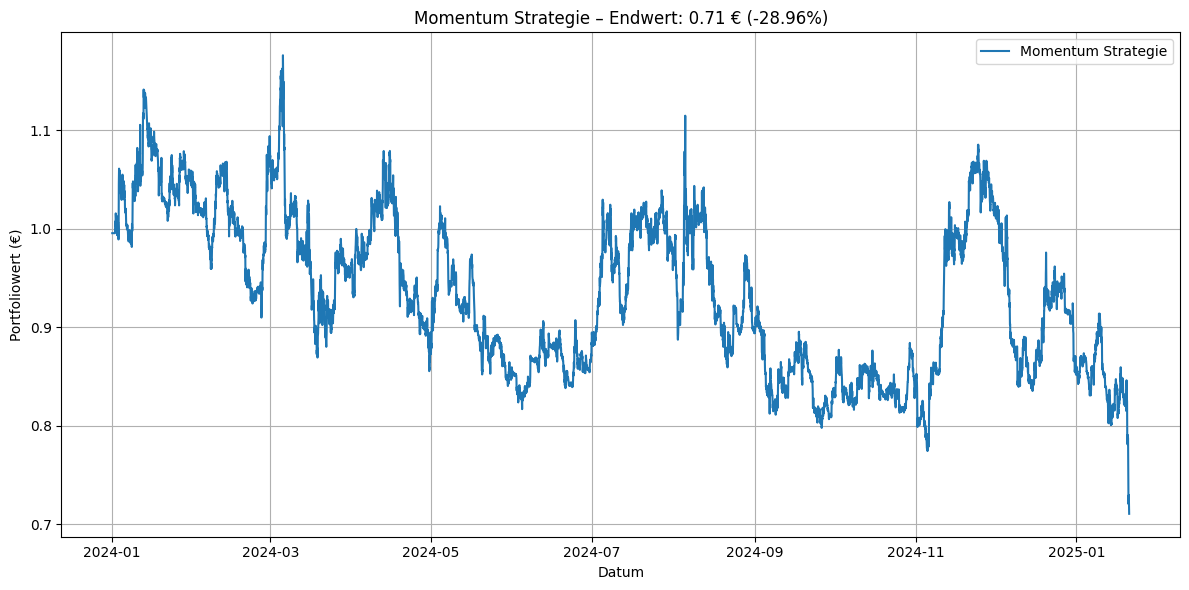

Final portfolio value: 2.09 USD
Profit: 1.09 USD
Annualized Return: 100.75%
Sharpe Ratio: 1.59
Max Drawdown: -31.89%
Win Rate: 42.86%
Loss Rate: 57.14%


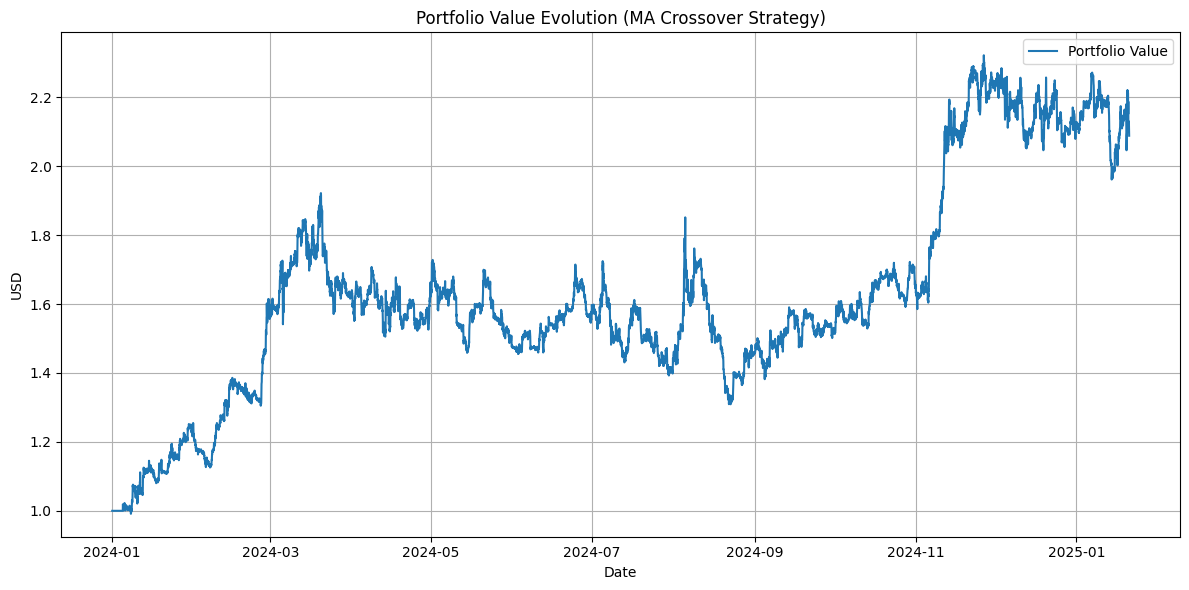

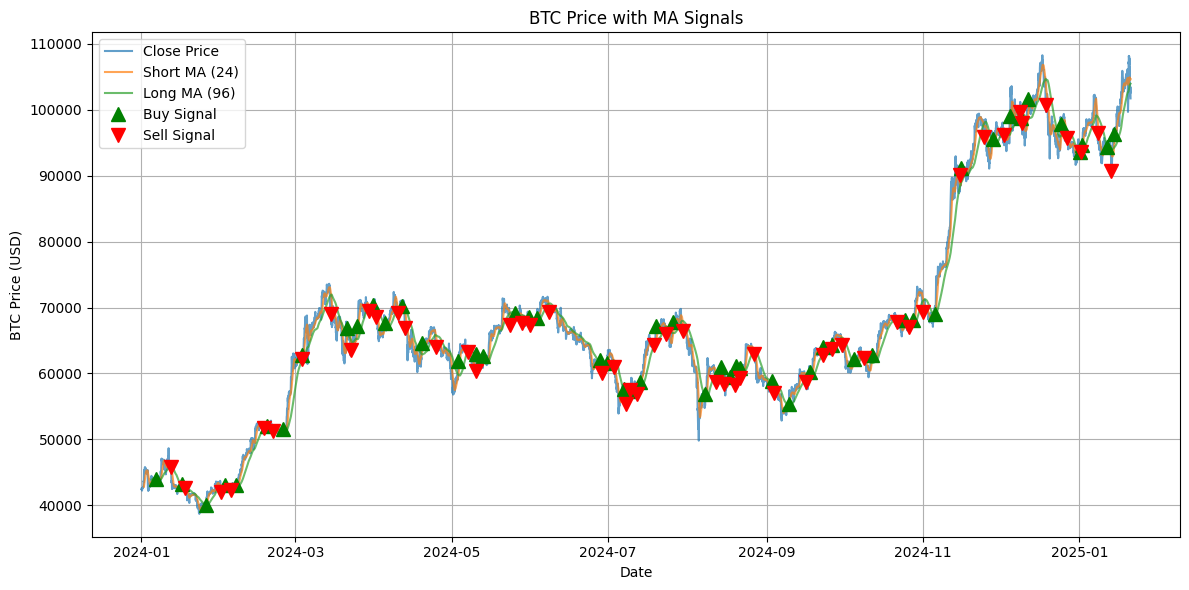

Updated Python path: ['c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311', '', 'C:\\Users\\tlfin\\AppData\\Roaming\\Python\\Python311\\site-packages', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\Pythonwin', 'e:\\Studienarbeit_GitHub\\Studienarbeit', 'e:\\Studienarbeit_GitHub']
e:\Studienarbeit_GitHub\Studienarbeit\Backtesting
Notebook ausgeführt
e:\Studienarbeit_GitHub\Studienarbeit\Backtesting
Notebook ausgeführt
Updated Python path: ['c:\\Users\\t

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from Strategien.bollinger_strategy import run_bollinger_strategy
from Strategien.momentum import run_momentum_strategy
from Strategien.Moving_Average import run_moving_average_strategy
from Strategien.Buy_and_Hold import run_buy_and_hold_strategy


#from RL_Backtest_Agents.DQN_Backtest import run_dqn_backtest, compute_backtest_metrics
from RL_Backtest_Agents.PPO_Backtest_v1 import run_ppo_backtest_v1
from RL_Backtest_Agents.PPO_Backtest_v2 import run_ppo_backtest_v2
#from RL_Backtest_Agents.A2C_Backtest_v1 import run_a2c_backtest_v1
#from RL_Backtest_Agents.A2C_Backtest_v2 import run_a2c_backtest_v2
#from RL_Backtest_Agents.A2C_Backtest_v3 import run_a2c_backtest_v3
#from RL_Backtest_Agents.A2C_Backtest_v4 import run_a2c_backtest_v4


# A2C Agenten vergleichen

C:\Users\tlfin\AppData\Local\Temp\ipykernel_10816\769075753.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


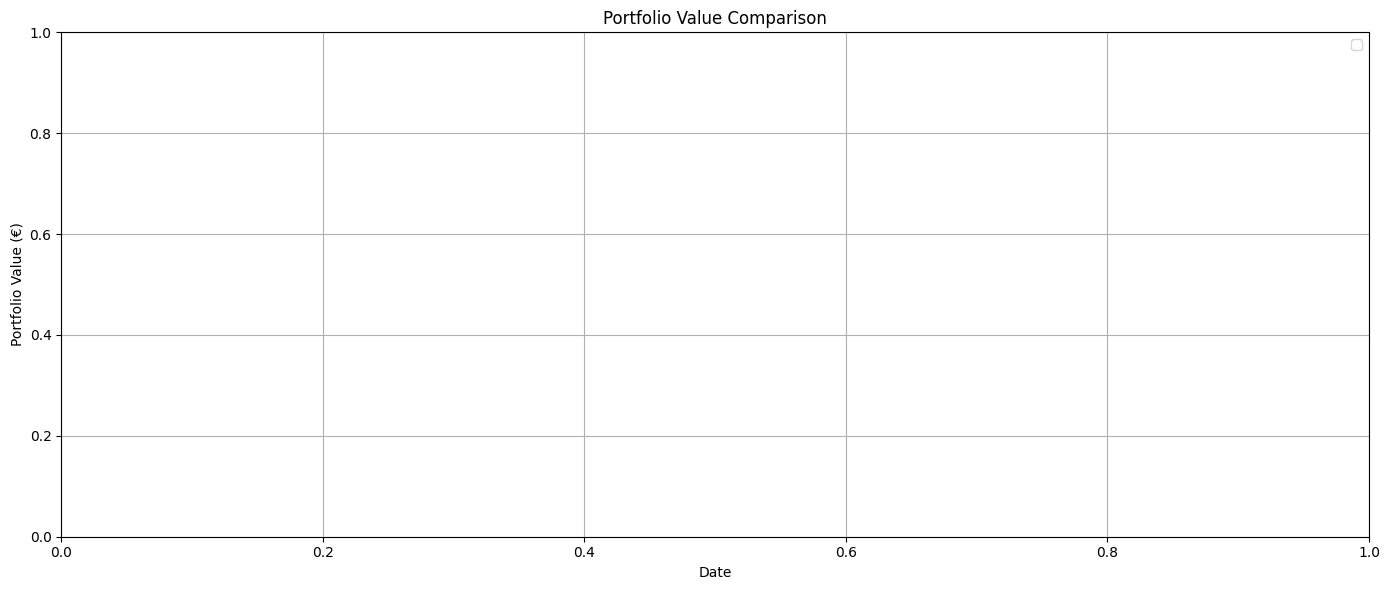

In [4]:
# Strategien ausführen
#a2c_result_v1 = run_a2c_backtest_v1()
#a2c_result_v2 = run_a2c_backtest_v2()

# Portfolios extrahieren
strategies = {
    
    #"A2C Agent_v1": a2c_result_v1["portfolio"],
    #"PPO Agent_v2": a2c_result_v2["portfolio"]
}

plt.figure(figsize=(14, 6))
for name, values in strategies.items():
    plt.plot(values.index, values.values, label=name)
plt.title("Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# PPO Agenten vergleichen

Seed in the environment: 42
Seed in the environment: 42


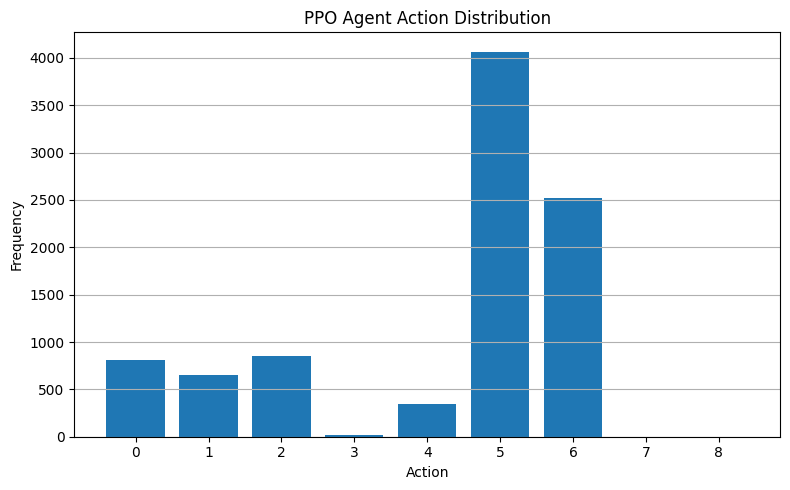

Seed in the environment: 42
Seed in the environment: 42


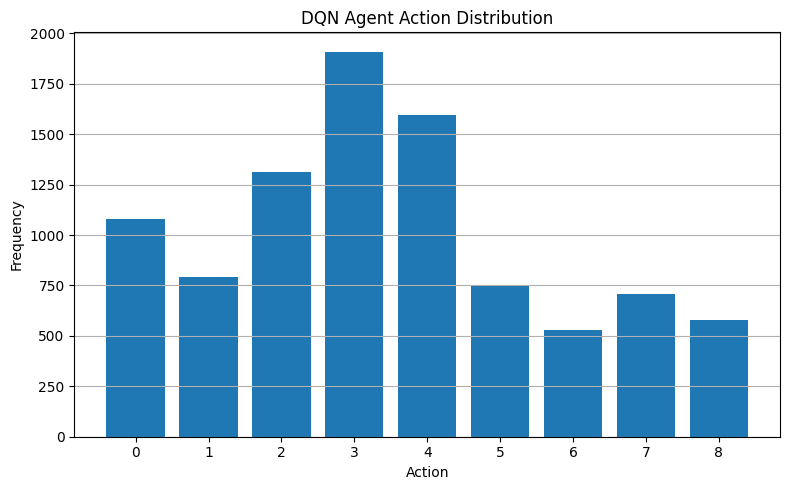

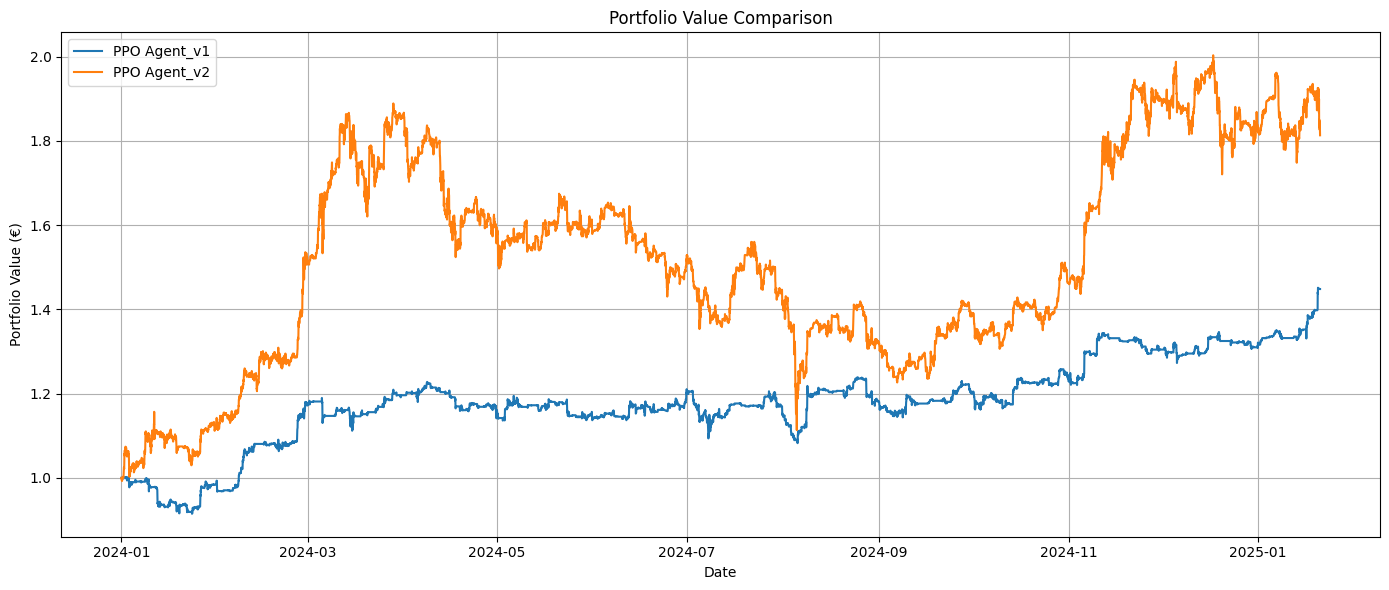

In [5]:
# Strategien ausführen
ppo_result_v1 = run_ppo_backtest_v1()
ppo_result_v2 = run_ppo_backtest_v2()

# Portfolios extrahieren
strategies = {
   
    "PPO Agent_v1": ppo_result_v1["portfolio"],
    "PPO Agent_v2": ppo_result_v2["portfolio"]
}

plt.figure(figsize=(14, 6))
for name, values in strategies.items():
    plt.plot(values.index, values.values, label=name)
plt.title("Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Strategien ausführen für beste Agenten und Strategien

Seed in the environment: 42
Seed in the environment: 42


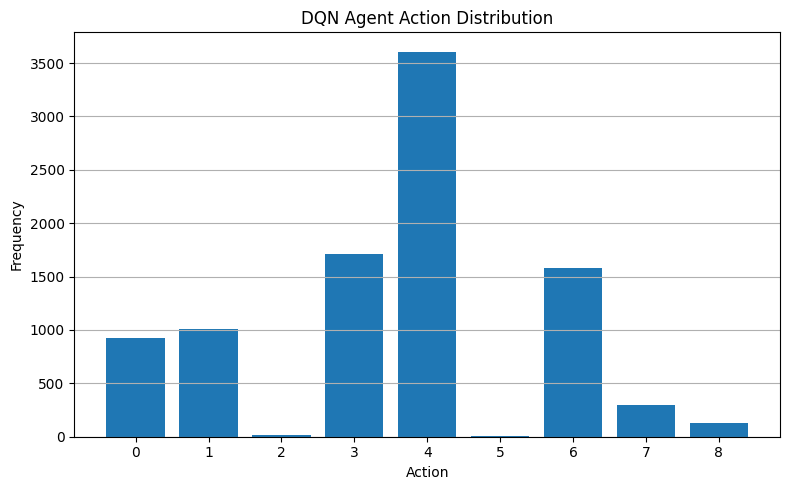

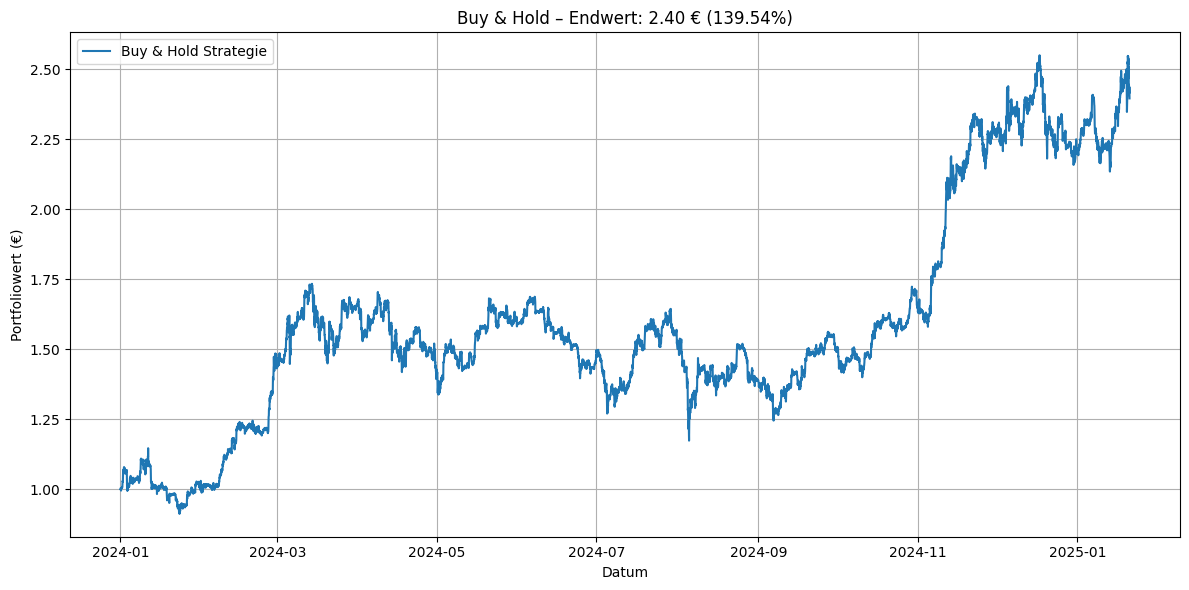

In [ ]:
# Strategien ausführen
ma_result = run_moving_average_strategy()
bollinger_result = run_bollinger_strategy()
momentum_result = run_momentum_strategy()
#dqn_result = run_dqn_backtest()
bh_result = run_buy_and_hold_strategy()

#a2c_result = run_a2c_backtest()
ppo_result = run_ppo_backtest_v2()

# Portfolios extrahieren
strategies = {
    "Moving Average": ma_result["portfolio"],
    "Bollinger Bands": bollinger_result["portfolio"],
    "Momentum": momentum_result["portfolio"],
    "Buy & Hold": bh_result["portfolio"],
    #"DQN Agent": dqn_result["portfolio"],
    #"A2C Agent": a2c_result["portfolio"],
    "PPO Agent": ppo_result["portfolio"]
}


Portfoliowerte vergleichen 

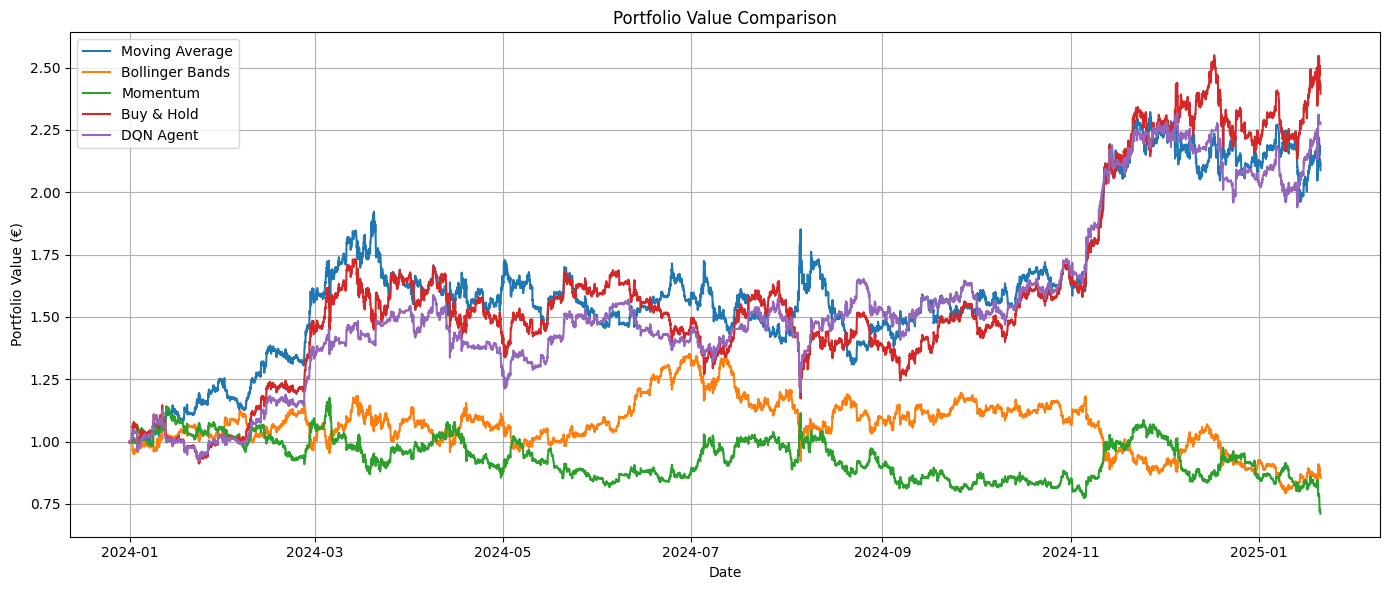

In [ ]:
plt.figure(figsize=(14, 6))
for name, values in strategies.items():
    plt.plot(values.index, values.values, label=name)
plt.title("Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Metriken Vergleichen

In [ ]:
results = {}
for name, values in strategies.items():
    metrics = compute_backtest_metrics(values)
    results[name] = metrics

pd.DataFrame(results).T.round(4)


,final_portfolio_value,profit,annualized_return,sharpe_ratio,max_drawdown,win_rate,loss_rate
Moving Average,2.0886,1.0886,1.0064,1.5876,-0.3189,0.4909,0.4970
Bollinger Bands,0.8543,-0.1416,-0.1350,-0.0090,-0.4132,0.5123,0.4838
Momentum,0.7104,-0.2849,-0.2730,-0.3388,-0.3959,0.4727,0.5229
Buy & Hold,2.3954,1.3954,1.2840,1.8248,-0.3233,0.5123,0.4860
DQN Agent,2.2755,1.2755,1.1758,2.0207,-0.2455,0.5025,0.4751


: 